In [976]:
import numpy as np
import pandas as pd

In [977]:
df = pd.read_csv('penguins.csv')


In [978]:
# main stats of df
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [979]:
# information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [980]:
# change data type
df["species"] = df["species"].astype("category")
df["island"] = df["island"].astype("category")
df["sex"] = df["sex"].astype("category")

In [981]:
display(df.dtypes)

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
year                    int64
dtype: object

In [982]:
# median
median = df.median()
median

bill_length_mm         44.45
bill_depth_mm          17.30
flipper_length_mm     197.00
body_mass_g          4050.00
year                 2008.00
dtype: float64

In [983]:
# sum of missing entries
sum = df.isnull().sum(axis=0)
sum

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [984]:
# drop missing data row
df = df.dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


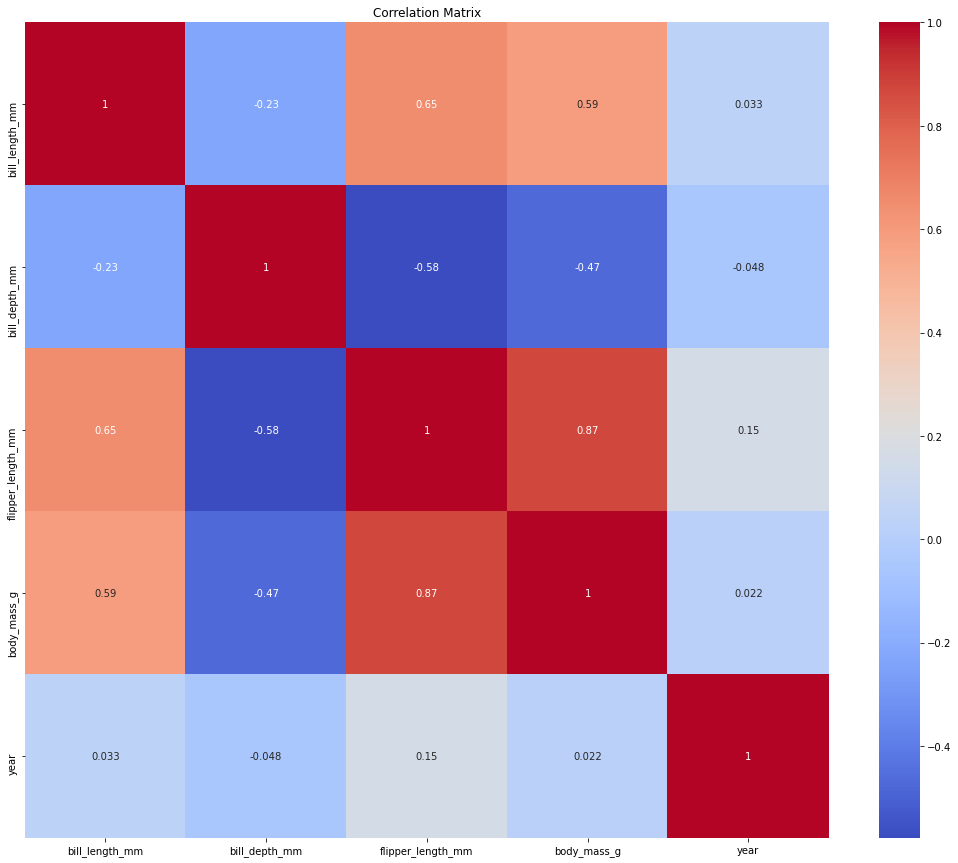

In [985]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, cmap="coolwarm")

plt.title("Correlation Matrix")
plt.show()

In [986]:
# normalize
index = [2, 3, 4, 5]  
min_values = df.iloc[:, index].min()
max_values = df.iloc[:, index].max()

# rescale to the range [0, 1]
norm_df = (df.iloc[:, index] - min_values) / (max_values - min_values)

print(norm_df)



     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0          0.254545       0.666667           0.152542     0.291667
1          0.269091       0.511905           0.237288     0.305556
2          0.298182       0.583333           0.389831     0.152778
4          0.167273       0.738095           0.355932     0.208333
5          0.261818       0.892857           0.305085     0.263889
..              ...            ...                ...          ...
339        0.861818       0.797619           0.593220     0.361111
340        0.414545       0.595238           0.508475     0.194444
341        0.636364       0.607143           0.355932     0.298611
342        0.680000       0.702381           0.644068     0.388889
343        0.658182       0.666667           0.440678     0.298611

[333 rows x 4 columns]


In [987]:
# X (input) select the most relevant columns as features 
# y (target) select quality as target
y = df[df.columns[-2]]
X = norm_df

# map my categories
y = df[df.columns[-2]].map({'female': 0, 'male': 1})
y

0      1
1      0
2      0
4      0
5      1
      ..
339    1
340    0
341    1
342    1
343    0
Name: sex, Length: 333, dtype: category
Categories (2, int64): [0, 1]

In [988]:
# split data to 80/20
rows = df.shape[0]
size = round(rows*0.8)

X_train = X.iloc[:size]
X_test = X.iloc[size:]
y_train = y.iloc[:size]
y_test = y.iloc[size:]

# back to int for model training
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (266, 4)
y_train shape: (266,)
X_test shape: (67, 4)
y_test shape: (67,)


In [1011]:
# logistic regression
class LogitRegression():
    def __init__(self, lrate, iters):
        self.lrate = lrate
        self.iters = iters
        
        
    def fit(self, X, y):
        self.weights = np.random.uniform(0, 1, size=X.shape[1])

        self.bias = 0
        self.loss = []

        for i in range(self.iters):
            self.gradient_descent(X, y)
            cost = self.cost(X, y)
            self.loss.append(cost)
        
        print(f"Iteration {i + 1}/{self.iters}, Loss: {cost:.2f}")
        print("complete")    
        return self.loss

    def sigmoid(self, z):
        sig = 1/(1 + np.exp(-z))
        return sig

    def cost(self, X, y):       
        p1 = -y * np.dot(X, self.weights)
        p2 = np.log(1 + np.exp(np.dot(X, self.weights)))
        cost = np.sum(p1 + p2)/len(y)
        return cost


    def gradient_descent(self, X, y):
        z = np.dot(X, self.weights) + self.bias
        pred = self.sigmoid(z)

        dw = -np.dot(X.T, (y - pred))
        db = -np.sum(y - pred)

        self.weights -= self.lrate * dw
        self.bias -= self.lrate * db



    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        pred = self.sigmoid(z)
        
        Y = []
        for i in list(pred):
            if i > 0.5:
                Y.append(1)
            else:
                Y.append(0)
        return Y



In [1023]:
# train the model
# suggested hyperparameters
learning_rate = 20e-6
iterations = 1000

model = LogitRegression(learning_rate, iterations)
loss = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

fweight = model.weights
fweight



Iteration 1000/1000, Loss: 0.71
complete


array([-0.03182998,  0.75122129,  0.51905311,  0.74066289])

In [1024]:
# evaluation metric
def Accuracy(y_true,y_pred):
    FP = np.sum((y_true==0) & (y_pred==1))
    TP = np.sum((y_true==1) & (y_pred==1))
    FN = np.sum((y_true==1) & (y_pred==0))
    TN = np.sum((y_true==0) & (y_pred==0))
    correct = TP + TN
    incorrect = FN + FP
    Acc = (TP + TN)/(TP + TN + FN + FP)
    return Acc,correct,incorrect

In [1025]:
# evaluation
y_pred1 = pd.DataFrame({'y_pred1': y_pred})
y_test = y_test.reset_index(drop=True)

eva = Accuracy(y_test, y_pred1['y_pred1'])

print(f"Accuracy: {eva[0]:.2%}")
print(f"Correct: {eva[1]:}")
print(f"Incorrect: {eva[2]:}")
print("Loss Values:")
iteration_list = []
loss_list = []
for i, losv in enumerate(loss):
    print(f"Iteration {i+1}: Loss = {losv:.4f}")
    iteration_list.append(i+1)
    loss_list.append(round(losv, 4))



Accuracy: 67.16%
Correct: 45
Incorrect: 22
Loss Values:
Iteration 1: Loss = 0.7581
Iteration 2: Loss = 0.7579
Iteration 3: Loss = 0.7578
Iteration 4: Loss = 0.7576
Iteration 5: Loss = 0.7575
Iteration 6: Loss = 0.7573
Iteration 7: Loss = 0.7572
Iteration 8: Loss = 0.7570
Iteration 9: Loss = 0.7569
Iteration 10: Loss = 0.7567
Iteration 11: Loss = 0.7566
Iteration 12: Loss = 0.7564
Iteration 13: Loss = 0.7563
Iteration 14: Loss = 0.7561
Iteration 15: Loss = 0.7560
Iteration 16: Loss = 0.7558
Iteration 17: Loss = 0.7557
Iteration 18: Loss = 0.7555
Iteration 19: Loss = 0.7554
Iteration 20: Loss = 0.7552
Iteration 21: Loss = 0.7551
Iteration 22: Loss = 0.7549
Iteration 23: Loss = 0.7548
Iteration 24: Loss = 0.7546
Iteration 25: Loss = 0.7545
Iteration 26: Loss = 0.7543
Iteration 27: Loss = 0.7542
Iteration 28: Loss = 0.7541
Iteration 29: Loss = 0.7539
Iteration 30: Loss = 0.7538
Iteration 31: Loss = 0.7536
Iteration 32: Loss = 0.7535
Iteration 33: Loss = 0.7533
Iteration 34: Loss = 0.7532
I

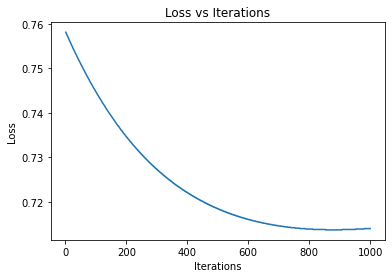

In [1026]:
# plot
plt.plot(iteration_list , loss_list)
plt.axis('auto')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.show()